<a href="https://colab.research.google.com/github/tim-sadler/tutorials/blob/main/PromotionAnalyses/CouponsValue/CouponAnalysis_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
!pip install matplotlib==3.1.1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Promotion Analysis: The Effect of Coupons on Customer Value (I)

## Why this Analysis is Relevant

Companies, especially e-commerce businesses regularly run campaigns to attract customers or boost sales. Coupons are among the most favored promotional instruments, as they have important features:

- they can be sent out only to certain customers, if desired, and
- the customer has to actively use the coupon code in the checkout process, which is why many more customers are exposed to the campaign than end up actually getting the (from the business perspectice) expensive discounts.

However, coupons - really any kind of promotion - comes with a huge disadvantage:

**They might be boosting short-term sales, but they are also likely to attract "discount-prone" customers, that only but when they see a promotion.**

Therefore, the question is, how valuable are the customers we acquire with sich coupons? In this post I show a simple procedure to analyze this question and use the results to improve usage of promotions for customer acquisition.

## Research Question

The RQ behind this analysis is the following: 

*What is the long-term value of customers acquired with coupons vs. organically acquired customers?*

Our a-priori expectation of hypothesis would be: *These customers are less valuable (in terms of revenue generated) than organic customers*.

## Our Example Case

Let's assume we are running this example for the case of an online store for non-food fast-moving consumer goods. let's assume they sell soaps, candles, socks and and other kind of items in the price range of single to small double digit figures.

Our customers can only purchase if they are signed-in or have an email address provided. Like with many e-commerce platform, we can obtain transactional data like this:



In [37]:
transactions = pd.read_csv("transactions_with_coupons.csv", index_col = False)

In [38]:
transactions.head()

,customer_id,acquisition_date,total_purchases,date,quantity,revenue,campaign,coupon_code,discount
0,00378459dfa86b57b6f582a316d12034,2019-07-11,10,2019-07-25,7,57.12,NaN,NaN,0.0
1,00378459dfa86b57b6f582a316d12034,2019-07-11,10,2019-09-16,1,12.47,NaN,NaN,0.0
2,00378459dfa86b57b6f582a316d12034,2019-07-11,10,2020-01-31,5,30.75,NaN,NaN,0.0
3,00378459dfa86b57b6f582a316d12034,2019-07-11,10,2020-03-02,5,68.40,NaN,NaN,0.0
4,00378459dfa86b57b6f582a316d12034,2019-07-11,10,2020-03-05,8,78.96,NaN,NaN,0.0


There is one row per customer and transaction with nine columns:

- *customer_id*: unique identifier of the customer
- *acquisition_date*: the date at which the customer had their first transaction (the same for all transactions of the same customer)
- *date*: the date of the transaction
- *revenue*: the total revenue of the transaction (amount paid by the customer)
- *campaign*: name of the campaign the customer redeemed a coupon from
- *coupon_code*: the coupon code used to
obtain the discount
- *discount*: the relative discount obtained with the coupon

The latter three columns are NA, if the transaction did not involve a coupon.

In [39]:
transactions.describe(include = "all", datetime_is_numeric=True)

,customer_id,acquisition_date,total_purchases,date,quantity,revenue,campaign,coupon_code,discount
count,2432,2432,2432.000000,2432,2432.000000,2432.000000,353,353,2432.000000
unique,992,1000,NaN,1024,NaN,NaN,4,4,NaN
top,69db9f9ce6e81a9c1bf3fbfe07bb9d09,2021-11-04,NaN,2022-12-28,NaN,NaN,Newsletter,TLMIVP,NaN
freq,11,11,NaN,13,NaN,NaN,281,281,NaN
mean,NaN,NaN,3.805099,NaN,5.582237,55.689359,NaN,NaN,0.016057
std,NaN,NaN,2.475351,NaN,2.869975,33.865079,NaN,NaN,0.039850
min,NaN,NaN,1.000000,NaN,1.000000,5.100000,NaN,NaN,0.000000
25%,NaN,NaN,2.000000,NaN,3.000000,30.487500,NaN,NaN,0.000000
50%,NaN,NaN,3.000000,NaN,5.500000,51.300000,NaN,NaN,0.000000
75%,NaN,NaN,5.000000,NaN,8.000000,75.285000,NaN,NaN,0.000000


Here, we can see that we have about 1,000 customers making a total of 2,432 transactions.

In [40]:
print(f"Start: {transactions['date'].min()}, End: {transactions['date'].max()}")

Start: 2018-01-27, End: 2022-12-31


The time frame considered is between beginning of 2018 and December 2022.

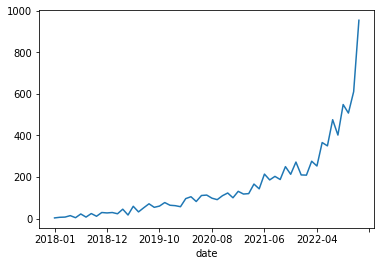

In [41]:
transactions.groupby(pd.to_datetime(transactions.date).dt.strftime("%Y-%m"))["total_purchases"].sum().plot()

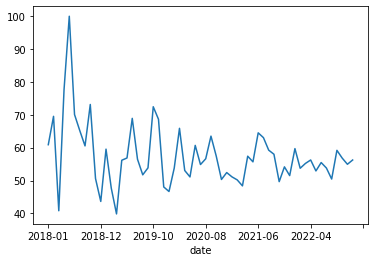

In [42]:
transactions.groupby(pd.to_datetime(transactions.date).dt.strftime("%Y-%m"))["revenue"].mean().plot()

In [43]:
transactions.groupby("campaign").agg({"discount": "mean", "date": ["min", "max"]})

discount        date            
                   mean         min         max
campaign                                       
Newsletter         0.10  2018-03-18  2022-12-31
Partner            0.15  2018-12-05  2022-12-23
Valentines2021     0.20  2021-02-14  2021-02-14
Valentines2022     0.25  2022-02-14  2022-02-14

We can also identify two campaigns: Newsletter and Valentines22.

- **Newsletter**: An ongoing campaign yielding ten percent discount for a newsöetter sign-up.
- **Valentines22**: A one-off campaign for Valentine's Day giving a 25 percent discount.

## Data Prep

The above data is a pretty standard format to be obtained from an online store backend. In order to reproduce the following steps of data preparation, make sure you have the data in the same shape, i. e. one row per customer and transacrion / purchase incidence.

### Calculating Discount and Revenue before Discount

The first thing you may habe noticed is the *revenue* column, containing the payment amount for each transaction. We want to determine the *revenue before discount* and the actual *discount* in $.

In [44]:
transactions["discount_amount"] = (transactions["revenue"]*(1+transactions["discount"]))-transactions["revenue"]

In [45]:
transactions["revenue_before_discount"] = transactions["revenue"] + transactions["discount_amount"]

### Splitting between First and Later Transactions

Recall, that we want to know which effect a coupon upon acquisition has on the value of the customer. The contribution to the total value from the first transaction is, due to the discount, systematically biased (i. e., lower) if a coupon is used. Therefore, we will split the transactions into the first and later transactions.

```mermaid
gantt
    title A Gantt Diagram
    dateFormat  YYYY-MM-DD
    axisFormat %m/%y
    section Repeating Customer
    Acquisition Transaction           :a1, 2020-08-01, 1d
    Repeat Transaction                :a2, 2020-10-27, 1d
    Repeat Transaction                :a3, 2021-02-02, 1d
    section One-time Customer
    Acquisition Transaction           :b1, 2020-09-12, 1d
```

For that we first need to find the rolling number of each transaction.

In [46]:
transactions["transaction_num"] = transactions.groupby("customer_id").cumcount()+1

Lets see how many customer per total number of transactions we have:

In [47]:
transactions.groupby("transaction_num").size()

transaction_num
1     992
2     598
3     344
4     216
5     112
6      64
7      44
8      31
9      19
10     10
11      2
dtype: int64

In the second row we can see that we have 599 repeating customers with at least two transactions and only 396 customers 

We will now extract the characteristicsof each of the customers' first transaction and append it to a summarized data frame of later transactions.

In [48]:
first_transactions = transactions[transactions["transaction_num"] == 1][["customer_id", "total_purchases", "acquisition_date", "quantity", "campaign"]].set_index("customer_id")

Let's do some renaming to make the information easily interpretable and also replace the NAs in campaigns with "None", so they don't get accidentally dropped:

In [49]:
first_transactions.columns = ["total_purchases", "acquisition_date", "quantity_first", "campaign_first"]

In [50]:
first_transactions["campaign_first"] = first_transactions["campaign_first"].fillna("None")

In [51]:
first_transactions["repeat_customer"] = np.where(first_transactions["total_purchases"] > 1, 1, 0)

In [52]:
first_transactions.groupby("repeat_customer").size()

repeat_customer
0    396
1    596
dtype: int64

In [53]:
first_transactions.to_csv("first_transactions.csv")

In [54]:
later_transactions = transactions[transactions["transaction_num"] > 1].groupby("customer_id").agg({"customer_id": "count", "revenue": "sum", "quantity": "mean", "date": "max", "discount": "mean"})

We are aggregating the later transactions for each customer and get the total number of later transactions, total revenue (i. e., value), the mean quantity purchased, the date of latest purchase and the mean discount from later transactions. We elaborate on the need for each of these variables later. First, lets do some
renaming for better interpretability:

In [55]:
later_transactions.columns = ["transactions_num_later", "value", "quantity_later", "max_date", "discounts_later"]

Now, let's merge the aggregated later transactions with the characteristics of the first transactions.

In [56]:
later_transactions = later_transactions.merge(first_transactions, left_index = True, right_index = True, how = "left")

We now have a data frame with one row per customer and the information of later and first transactions as columns. Let's take a brief look:

In [57]:
later_transactions.head()

,transactions_num_later,value,quantity_later,max_date,discounts_later,total_purchases,acquisition_date,quantity_first,campaign_first,repeat_customer
customer_id,,,,,,,,,,
00378459dfa86b57b6f582a316d12034,9,469.08,4.777778,2022-03-16,0.0,10,2019-07-11,7,None,1
008f155e8c211d9ca127ea9912f0cea4,1,57.30,10.000000,2020-07-18,0.1,2,2018-04-19,6,Newsletter,1
009d3b8641ccfde1b87a6cda1a2b1ab1,3,280.57,9.000000,2022-12-29,0.0,4,2022-12-11,3,None,1
01cff9d83b648ffb68d686f8c287866f,6,272.00,4.666667,2022-07-03,0.0,7,2019-06-21,2,None,1
01d9a9e79f6c83e7674574b38eedba7b,2,70.77,5.000000,2022-07-15,0.0,3,2021-09-28,8,None,1


In [58]:
later_transactions.groupby("campaign_first")[["value", "transactions_num_later"]].mean()

,value,transactions_num_later
campaign_first,,
Newsletter,97.434068,1.898305
None,136.548127,2.449438
Partner,208.322000,4.000000


At first glance it looks like, customers acquired with a *Newletter* coupon indeed create less value in later transactions and the column *transactions_num_later* indicates that they do so due to less frequent transactions.

**However**: There might be a bias here. It might happen that *organic* customers have longer tenure or retention (i. e. joined earlier) than customers acquired with the *Newsletter* coupon. We thus have to correct for potential differences in the length of the customer lifetime duration. 

### Correcting for Different Lifetime Lengths

There are different options to do so, the simplest being to calculate the duration between the acquisition date and the date of the last transaction and divide the value by it. However, this opens up the possibility of another bias: customers who joined very late did not have the ability to accumulate a long lifetime, still their short lifetime would get weighted more strongly when dividing by a smaller number.

The second option would be to remove, e. g. the most recent year from the data and thua remove the bias created by more recent customers. This however would also reduce the number of customers to analyze.

We therefore chose a third option: divide the value (and # of transactions) by the remaining time left in the data to observe the customer. 

Example: a customer males their most recent transaction in the last week we observe. Wenthen divide their total value by 1 (week left), because we now, they are still an active customer. Correspondingly, a customer who has not made a transaction for 50 weeks has a much lower corrected value, as their chance of still being active is much lower.

In [59]:
later_transactions["remaining_weeks"] = (pd.to_datetime(later_transactions["max_date"].max()) - pd.to_datetime(later_transactions["max_date"])).dt.days//7 +1

In [60]:
later_transactions["value_corrected"] = later_transactions['value']/later_transactions["remaining_weeks"]
later_transactions["transactions_num_later_corrected"] = later_transactions["transactions_num_later"]/later_transactions["remaining_weeks"]

Above we calculated the remaining weeks in the data per customer (the minimum being one week) and divided the variables of interest by that value. We indicate the new values by the suffix *_corrected*.

In [61]:
result = later_transactions.groupby("campaign_first")[["value_corrected", "transactions_num_later_corrected"]].mean().transpose()
result

campaign_first,Newsletter,None,Partner
value_corrected,12.760600,30.518159,61.070850
transactions_num_later_corrected,0.236557,0.539741,1.040564


Displaying the mean corrected value and mean corrected later transactions, we see that also after correcting for the bias, 

## Interpretation

Recall our initial problem: If we acquire customers with the help of a promotion, it is very likely that we achieve short-term boosts of sales and maybe even customer acquisition. But we do not know the value of the customers acquired.

In this analysis, we have shown with a simple example how to derive the value from customers acquired via a coupon promotion vs. organic customers.

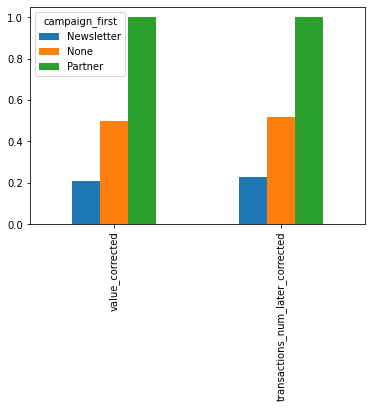

In [62]:
result.divide(result.max(axis = 1), axis = 0).plot(kind = "bar")

It appears that the *Partner* coupon is associated with the highest values, i. e. twice as high as *organic* customer. The the association exists for the number of transactions, which might serve as an explanation for the higher value: these customers' higher value might stem from more transactions. The *Newsletter* coupon shows the opposite relationship: The customers acquired with a newsletter sign-up coupon appear to only create half the value compared to the organic customers.

For the company it thus makes sense to increase the amount of the Partner coupons or revisit the way they issue the Newsletter coupon.

## Next Steps

There are multiple avenues to continue analysis here. We could...

1. dive more deeply into the differences between the customers and their acquisition characteristics, e. g. consider the season in which they were acquired, the order amount of the first transaction or other customer- or transaction-related factors (we do not have available here).
2. decompose customer repeat behavior further. For this we could deploy statistical models to derive the probability to make a repeat purchase, the reasons for different values (e. g. higher discounts or less transactions).

We will cover these two topics in the other sessions on Coupon Value Analysis.

In [63]:
later_transactions.to_csv("later_transactions.csv")